In [1]:
import numpy as np
import scipy.sparse 
import matplotlib.pyplot as plt
import pdb
import numpy.matlib
import time
import copy

from matplotlib import animation, rc
from scipy.sparse.linalg import spsolve
from scipy.integrate import solve_ivp
from scipy.sparse.linalg import splu
from scipy.sparse import csr_matrix, triu, spdiags


In [16]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

# Define parameters
m = 64
n = m * m # N value in x and y directions
x_min, x_max = -10, 10
dx = (x_max - x_min) / m

# total size of matrix
e0 = np.zeros(n) # vector of zeros
e1 = np.ones(n) # vector of ones
e2 = np.copy(e1) # copy the one vector
e4 = np.copy(e0) # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0 # overwrite every m^th value with zero
    e4[m*j-1] = 1 # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]
e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# Place diagonal elements
diagonals = [e1.flatten(), e1.flatten(), e5.flatten(),e2.flatten(),-4*e1.flatten(), e3.flatten(),e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]
A = spdiags(diagonals, offsets, n, n).toarray()
A = A/(dx**2) 
A[0,0] /= -2
print(A)
print(A.shape)

# Create matrix B
e = np.ones(n)

data_B = [e, -1*e, e, -1*e]
offsets_B = [-(n-m), -m, m, (n - m)]
B = spdiags(data_B, offsets_B, n, n).toarray()
B = B/(2*dx)
print(B)

# Create matrix C
e1 = np.zeros(n)
e2 = np.ones(n)
e3 = np.ones(n)
e4 = np.zeros(n)


for i in range(n):
    if (i + 1) % m == 1:
        e1[i] = 1
        e3[i] = 0
    if (i + 1) % m == 0:
        e2[i] = 0
        e4[i] = 1

e2 = -1*e2
e4 = -1*e4

C = spdiags([e1,e2, e3,e4],[-m+1, -1,1,m-1], n,n).toarray()
C = C/(2*dx)
            
print(C[0,:])
print(C[1,:])
print(C)

[[ 20.48  10.24   0.   ...   0.     0.     0.  ]
 [ 10.24 -40.96  10.24 ...   0.     0.     0.  ]
 [  0.    10.24 -40.96 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ... -40.96  10.24   0.  ]
 [  0.     0.     0.   ...  10.24 -40.96  10.24]
 [  0.     0.     0.   ...   0.    10.24 -40.96]]
(4096, 4096)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.  1.6 0.  ... 0.  0.  0. ]
[-1.6  0.   1.6 ...  0.   0.   0. ]
[[ 0.   1.6  0.  ...  0.   0.   0. ]
 [-1.6  0.   1.6 ...  0.   0.   0. ]
 [ 0.  -1.6  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   1.6  0. ]
 [ 0.   0.   0.  ... -1.6  0.   1.6]
 [ 0.   0.   0.  ...  0.  -1.6  0. ]]


In [3]:
# Parameters
n = 64  # Number of grid points
x_min, x_max = -10, 10  # Spatial domain in x
y_min, y_max = -10, 10  # Spatial domain in y
nu = 0.001  # Viscosity
t_span = (0, 4)  # Time span for integration
#t_span = (0, 10)
t_eval = np.arange(0, 4.5, 0.5)  # Time evaluation points
#t_eval = np.arange(0, 10.5, 0.5)
print(t_eval)

# Define spatial domain and initial conditions
x2 = np.linspace(x_min, x_max, n + 1)
x = x2[:n]
y2 = np.linspace(y_min, y_max, n + 1)
y = y2[:n]
X, Y = np.meshgrid(x, y)

# Initial vorticity (elliptical Gaussian)
omega0 = np.exp(-X**2 - Y**2 / 20)
omega0_flat = omega0.flatten()


def rhs_ode_GE(t, omega, A, B, C):
        
        #solving for A.psi = w using GE
        #psi0 = spsolve(A,omega_0)
        psi = np.linalg.solve(A,omega)
        psi_x = B@psi
        psi_y = C@psi
        omega_x = B@omega
        omega_y = C@omega
        omega = nu*(A@omega) - psi_x*omega_y + psi_y*omega_x
        return omega

def rhs_ode_LU(t, omega, A, B, C):
        
        #solving for A.psi = w using GE
        #psi0 = spsolve(A,omega_0)
        plu = splu(A)
        psi = plu.solve(omega)
        psi_x = B@psi
        psi_y = C@psi
        omega_x = B@omega
        omega_y = C@omega
        omega = nu*(A)@omega - np.multiply(psi_x,omega_y) + np.multiply(psi_y,omega_x)
        
        return omega

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]


In [13]:
A.tocsc()

AttributeError: 'numpy.ndarray' object has no attribute 'tocsc'

In [156]:
from scipy.linalg import lu, solve_triangular
def rhs_ode_LU(t, omega, A, B, C):
        
        #solving for A.psi = w using GE
        #psi0 = spsolve(A,omega_0)
        p, l, u = lu(A)
        pb = np.dot(p, omega)
        y = solve_triangular(l, pb, lower=True)
        x = solve_triangular(u, y)
        omega_x = B@omega
        omega_y = C@omega
        omega = nu*(A)@omega - B@x * omega_y + y * omega_x
        
        return omega

In [17]:
#%%time
start_time = time.time()
sol_GE = scipy.integrate.solve_ivp(lambda t,omega: rhs_ode_GE(t,omega, A, B, C), [0, 4], 
                                omega0_flat, t_eval = t_eval)
end_time = time.time()

elapsed_time = end_time - start_time
print(elapsed_time)
A3 = copy.deepcopy(sol_GE.y.T)
A3

/var/folders/nl/b7zy1y7s7qgbg3knnf6pq3w80000gn/T/ipykernel_49793/717737657.py:28: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  psi = spsolve(A,omega)


10.380240201950073


array([[ 2.50656748e-46,  1.17762859e-43,  4.55107657e-41, ...,
         1.96785570e-38,  6.19028421e-41,  1.60178709e-43],
       [-1.78630705e-36, -2.26093387e-29, -4.24661881e-29, ...,
         7.20814729e-28,  1.69117621e-28,  5.05834665e-29],
       [ 1.02614869e-36,  1.85614646e-29,  3.48720993e-29, ...,
        -6.58759786e-28, -1.49205998e-28, -4.38046443e-29],
       ...,
       [-5.75086257e-26, -1.48306461e-19, -2.20165937e-20, ...,
         4.01674620e-20,  3.00460834e-20,  2.47633369e-20],
       [-6.68013806e-25, -7.82424220e-19, -2.91637720e-19, ...,
         1.34371413e-19,  1.76009486e-19,  1.15181522e-20],
       [ 3.02201851e-24,  1.67449651e-18,  1.23961335e-18, ...,
        -8.94163775e-19, -9.80736832e-19,  3.12761254e-20]])

In [113]:
sol_GE.y.shape

(4096, 9)

In [18]:
#%%time
start_time = time.time()
sol_LU = scipy.integrate.solve_ivp(lambda t,omega: rhs_ode_LU(t,omega, A, B, C), [0, 4], 
                                omega0_flat, t_eval = t_eval)
end_time = time.time()

elapsed_time = end_time - start_time
print(elapsed_time)
A4 = copy.deepcopy(sol_GE.y.T)
A4

/var/folders/nl/b7zy1y7s7qgbg3knnf6pq3w80000gn/T/ipykernel_49793/717737657.py:42: SparseEfficiencyWarning: splu converted its input to CSC format
  plu = splu(A)


11.034134149551392


array([[ 2.50656748e-46,  1.17762859e-43,  4.55107657e-41, ...,
         1.96785570e-38,  6.19028421e-41,  1.60178709e-43],
       [-1.78630705e-36, -2.26093387e-29, -4.24661881e-29, ...,
         7.20814729e-28,  1.69117621e-28,  5.05834665e-29],
       [ 1.02614869e-36,  1.85614646e-29,  3.48720993e-29, ...,
        -6.58759786e-28, -1.49205998e-28, -4.38046443e-29],
       ...,
       [-5.75086257e-26, -1.48306461e-19, -2.20165937e-20, ...,
         4.01674620e-20,  3.00460834e-20,  2.47633369e-20],
       [-6.68013806e-25, -7.82424220e-19, -2.91637720e-19, ...,
         1.34371413e-19,  1.76009486e-19,  1.15181522e-20],
       [ 3.02201851e-24,  1.67449651e-18,  1.23961335e-18, ...,
        -8.94163775e-19, -9.80736832e-19,  3.12761254e-20]])

(9, 64, 64)


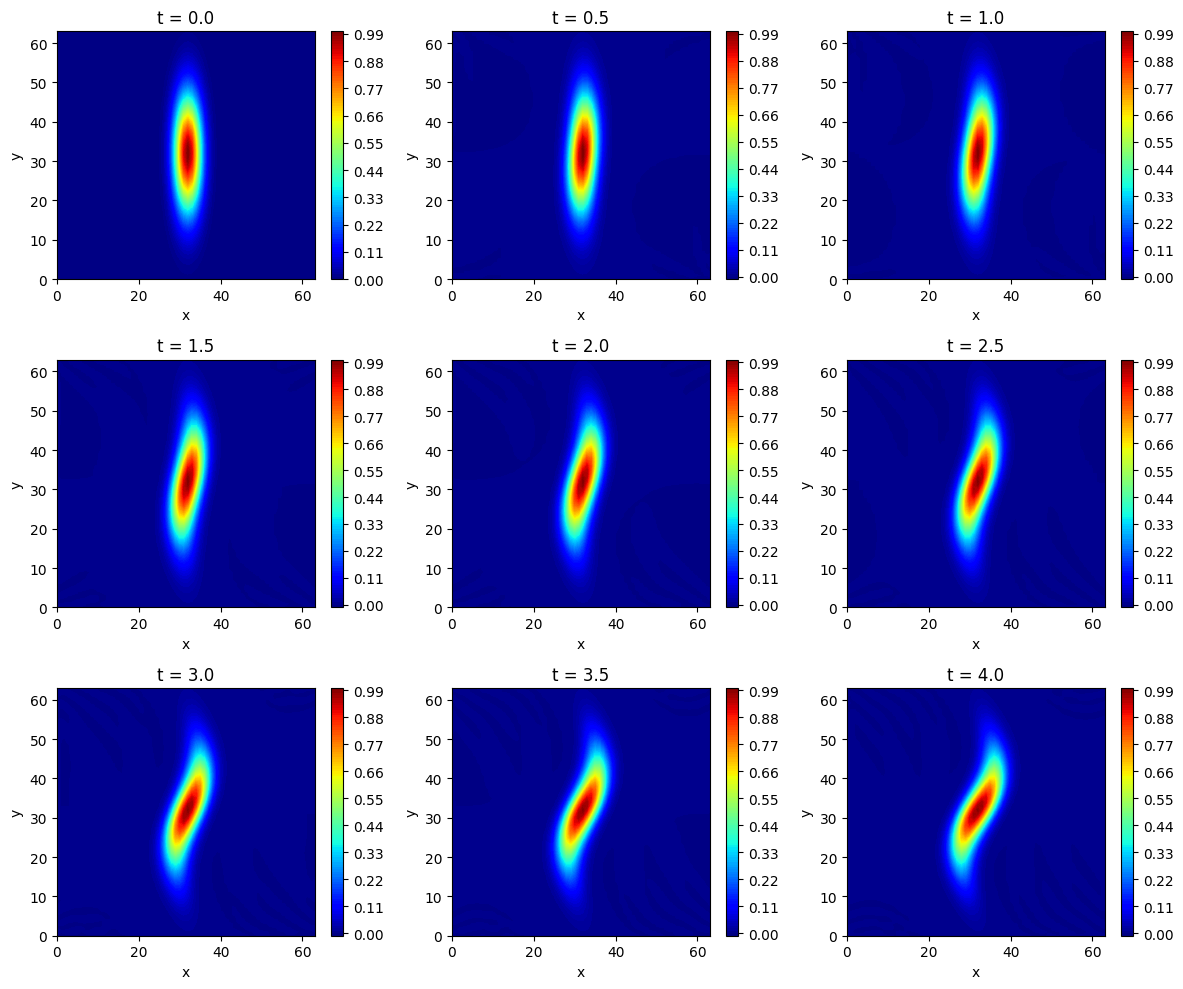

In [23]:
#reshaping sol.y
sol_y_reshaped = np.column_stack(sol_GE.y).reshape(-1,64,64)
print(np.shape(sol_y_reshaped))
#Plotting
fig, axa = plt.subplots(3, 3, figsize=(12,10))
for ax, i in zip(axa.ravel(), range(len(t_eval)+1)):
    #ax.imshow(sol_y_reshaped[i], interpolation = 'none');
    cp = ax.contourf(sol_y_reshaped[i],levels=100 ,cmap = 'jet');
    #ax.colorbar(cp)
    #cp = ax.pcolormesh(sol_y_reshaped[i].T,cmap='viridis',shading='auto')
    fig.colorbar(cp, ax = ax)
    ax.set_title("t = " + str(t_eval[i]))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
#plt.colorbar()
plt.tight_layout()

(9, 64, 64)


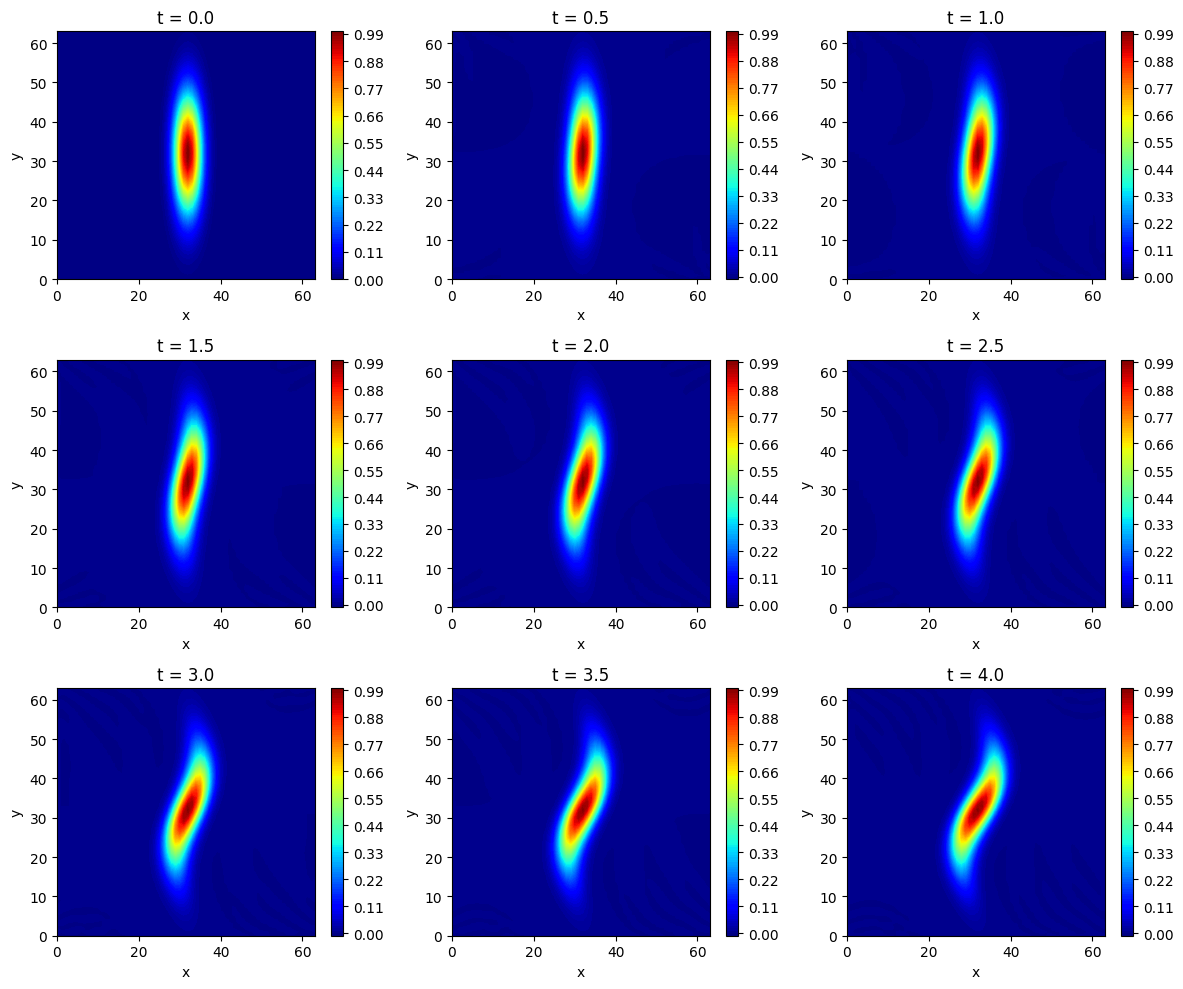

In [24]:
#reshaping sol.y
sol_y_reshaped = np.column_stack(sol_LU.y).reshape(-1,64,64)
print(np.shape(sol_y_reshaped))
#Plotting
fig, axa = plt.subplots(3, 3, figsize=(12,10))
for ax, i in zip(axa.ravel(), range(len(t_eval)+1)):
    #ax.imshow(sol_y_reshaped[i], interpolation = 'none');
    cp = ax.contourf(sol_y_reshaped[i],levels=100 ,cmap = 'jet');
    #ax.colorbar(cp)
    #cp = ax.pcolormesh(sol_y_reshaped[i].T,cmap='viridis',shading='auto')
    fig.colorbar(cp, ax = ax)
    ax.set_title("t = " + str(t_eval[i]))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
#plt.colorbar()
plt.tight_layout()

In [53]:
final_A3 = A3.T.reshape(64,64,81)

In [66]:
A3.shape

(81, 4096)

In [84]:
print(A3.T[1950:2050,:])

[[0.66354656 0.66038235 0.65724732 ... 0.52528542 0.52504255 0.52483837]
 [0.67333802 0.67171896 0.67013399 ... 0.65365439 0.65476371 0.65590446]
 [0.67663385 0.67663216 0.67666564 ... 0.77065808 0.77282212 0.77499959]
 ...
 [0.00831213 0.00830564 0.00829921 ... 0.00801517 0.00801385 0.00801258]
 [0.00673795 0.00673979 0.00674163 ... 0.00688188 0.00688382 0.00688575]
 [0.00916482 0.00916436 0.00916396 ... 0.00928648 0.00928972 0.009293  ]]


In [73]:
sol_GE.y.shape

(4096, 81)